In [1]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

from my_custom_pipeline.pipeline import MyPipeline

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
print(torch.cuda.is_available())

True


In [4]:
model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/mnt/petrelfs/wangyihao/miniconda3/envs/diffusion/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [15]:
pipe.scheduler.__class__

diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler

In [5]:
prompt = "a photo of an astronaut riding a horse on mars"
images = pipe(prompt).images

  0%|          | 0/50 [00:00<?, ?it/s]

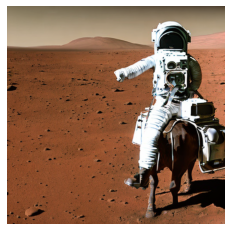

In [7]:
for image in images:
    plt.imshow(image)
    plt.axis('off')

(-0.5, 767.5, 767.5, -0.5)

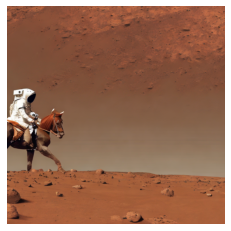

In [10]:
plt.imshow(image)
plt.axis('off')

In [8]:
image.save("output/astronaut_rides_horse_2.png")

In [3]:
model_id = "stabilityai/stable-diffusion-2-1"

my_pipe = MyPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
my_pipe.scheduler = DPMSolverMultistepScheduler.from_config(my_pipe.scheduler.config)


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/mnt/petrelfs/wangyihao/miniconda3/envs/diffusion/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


NameError: name 'pipe' is not defined

In [10]:
my_pipe = my_pipe.to("cuda")
prompt = "a photo of a cute girl"
images = my_pipe(prompt, return_all_images=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
import os
os.makedirs("output/seq", exist_ok=True)
for idx, image in enumerate(images):
    image[0].save(f"output/seq/{idx}.png")

In [16]:
model_id_pastel = "andite/pastel-mix"
pastel_pipe = StableDiffusionPipeline.from_pretrained(model_id_pastel, torch_dtype=torch.float16, device_map="auto")
pastel_pipe = pastel_pipe.to("cuda")

text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [17]:
prompt = "masterpiece, best quality, ultra-detailed, illustration, close-up, straight on, face focus, 1girl, \
    white hair, golden eyes, long hair, halo, angel wings, serene expression, looking at viewer"
negative_prompt = "lowres, ((bad anatomy)), ((bad hands)), text, missing finger, extra digits, fewer digits, blurry, \
    ((mutated hands and fingers)), (poorly drawn face), ((mutation)), ((deformed face)), (ugly), ((bad proportions)), \
        ((extra limbs)), extra face, (double head), (extra head), ((extra feet)), monster, logo, cropped, worst quality, \
            low quality, normal quality, jpeg, humpbacked, long body, long neck, ((jpeg artifacts))"
pastel_image = pastel_pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

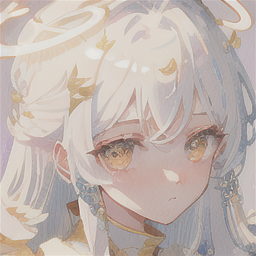

In [18]:
pastel_image